In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-uci-dataset/diabetes.csv


</br></br></br><p style="text-align: center;"><span style=" font-family: 'Bebas Neue'; font-size: 5em;">**Diabetes Prediction**</span></p></br></br></br>

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-uci-dataset/diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.shape

(520, 17)

In [4]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f53e7b4b4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53e7b4bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53e7b4b110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53e5add210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53e5add550>],
 'means': []}

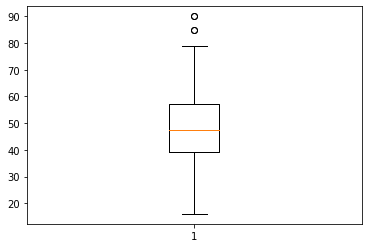

In [5]:
plt.boxplot(x=df['Age'],data='df')

In [6]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
floor, ceil = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df['Age'] = df['Age'].clip(floor, ceil)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f53e59e87d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53e59e8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53e59e8450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53e59f4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53e59f4890>],
 'means': []}

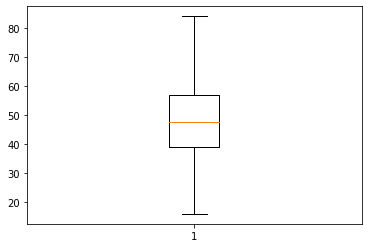

In [7]:
plt.boxplot(x=df['Age'],data='df')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [9]:
columns = df.columns
col = columns[1:]
col

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in col:
    df[i] = le.fit_transform(df[i])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


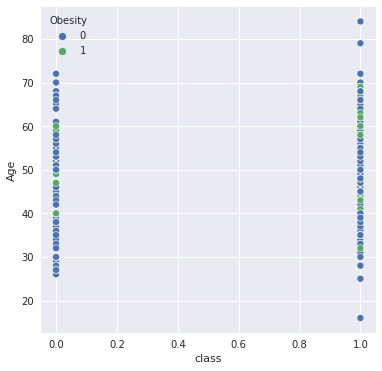

In [11]:
plt.style.use("seaborn")
plt.figure(figsize=(6, 6))
sns.scatterplot(x = df['class'], y = df['Age'], hue = df['Obesity'], data = df)
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

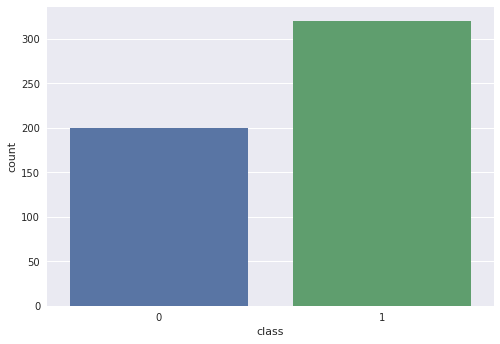

In [12]:
sns.countplot(x=df['class'],data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

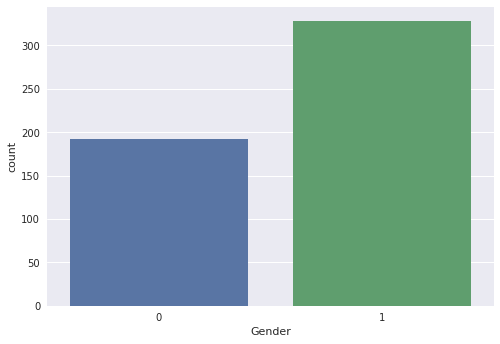

In [13]:
sns.countplot(x=df['Gender'],data=df)

In [14]:
### Seperating the Target feature and other features
y = df['class']                       # M or B 
list = ['class']
x = df.drop(list,axis = 1 )
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


<AxesSubplot:>

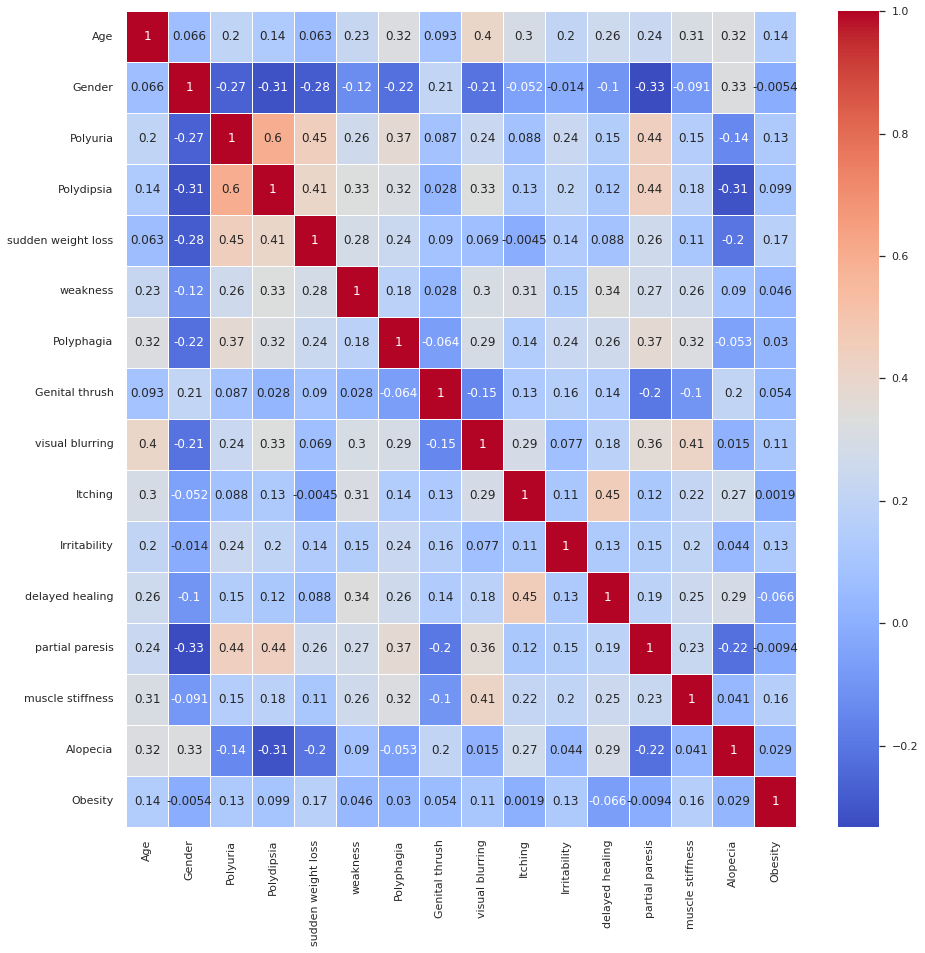

In [15]:
sns.set(font_scale=1)
plt.figure(figsize = (15,15))
sns.heatmap(x.corr(),cmap='coolwarm',annot=True,linewidths=.5)

From Correlation Map we can see that:</br>
* Age is closely correlated to Genital Thrush</br>
* Polyuria is closely correlated to Genital Thrush, Itching</br>
* Polydipsia is closely correlated to Obesity</br>
* Sudden Weight Loss is closely correlated to delayed healing</br>
</br>**So we can remove them!!!**

In [16]:
drop_list = ['Genital thrush','Itching','Obesity','delayed healing']
x = x.drop(drop_list,axis = 1 )  
print(x.shape)
x.head()

(520, 12)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
0,40.0,1,0,1,0,1,0,0,0,0,1,1
1,58.0,1,0,0,0,1,0,1,0,1,0,1
2,41.0,1,1,0,0,1,1,0,0,0,1,1
3,45.0,1,0,0,1,1,1,0,0,0,0,0
4,60.0,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

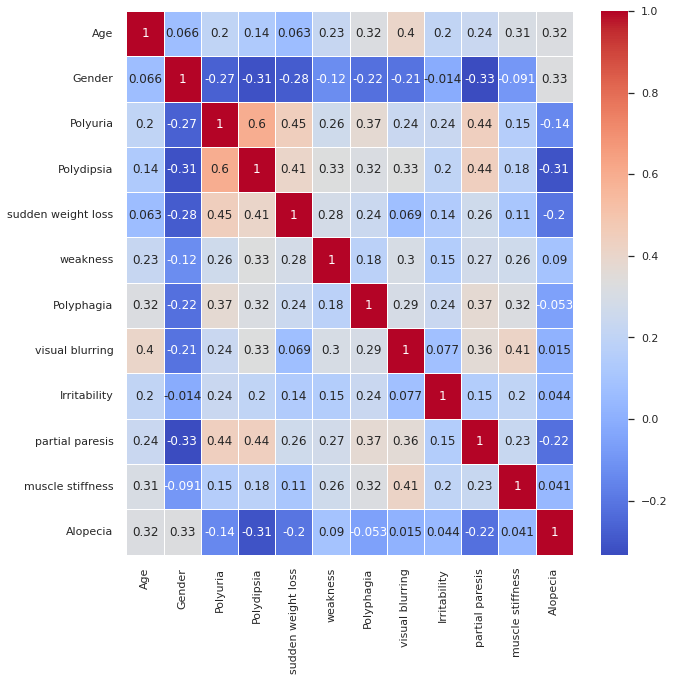

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(x_df)
# x_df_scaled = scaler.transform(x_df)
# x_test_scaled=scaler.transform(x_test)

sns.set(font_scale=1)
plt.figure(figsize = (10,10))
sns.heatmap(x.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9680851063829787


<AxesSubplot:>

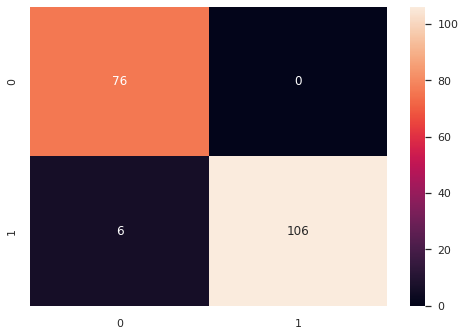

In [19]:
# split data train 64 % and test 36 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.36, random_state=18)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

We can see that, we have achieved an accurary of **96.8%** with making a few wrong predictions.

</br></br></br><p style="text-align: center;"><span style="font-family: 'Bebas Neue'; font-size: 2em;">**Tree based feature selection and random forest classification**</span></p></br></br></br>

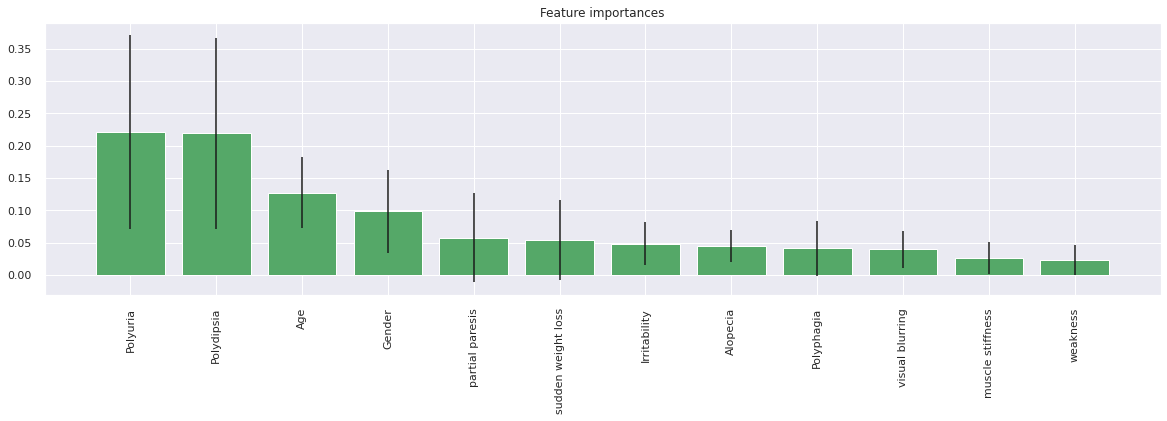

In [20]:
clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])

plt.show()

In [21]:
test_accuracies = []
t = x_train
t_2 = x_test

to_be_removed = []
for f in range(12):
    to_be_removed.append(x_train.columns[indices[f]])

for i in range(12,0,-1):
    clf_rf = RandomForestClassifier(random_state=43) 
    clr_rf = clf_rf.fit(t,y_train)
    test_ac = accuracy_score(y_test,clf_rf.predict(t_2))
    test_accuracies.append(test_ac)
    t = t.drop(to_be_removed[i-1],axis=1)
    t_2 = t_2.drop(to_be_removed[i-1],axis=1)

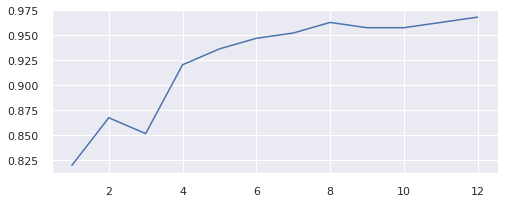

In [22]:
plt.figure(figsize=(8,3))
x_place = [12,11,10,9,8,7,6,5,4,3,2,1]
plt.plot(x_place,test_accuracies)
plt.show()

In [23]:
tweleve = indices[:12]
for f in range(len(tweleve)):
    print("%d. feature %d (%f)" % (f + 1, tweleve[f], importances[tweleve[f]]),end=' - ')
    print(x_train.columns[tweleve[f]])


1. feature 2 (0.221109) - Polyuria
2. feature 3 (0.219187) - Polydipsia
3. feature 0 (0.127183) - Age
4. feature 1 (0.098197) - Gender
5. feature 9 (0.057738) - partial paresis
6. feature 4 (0.053700) - sudden weight loss
7. feature 8 (0.048218) - Irritability
8. feature 11 (0.044910) - Alopecia
9. feature 6 (0.040898) - Polyphagia
10. feature 7 (0.039473) - visual blurring
11. feature 10 (0.026216) - muscle stiffness
12. feature 5 (0.023172) - weakness


In [24]:
x_train_12 = x_train
x_test_12 = x_test
print(x_train_12.shape)
x_train_12.head()

(332, 12)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
128,32.0,1,0,1,0,1,1,0,1,0,0,1
127,57.0,1,1,0,0,1,1,0,1,0,1,1
374,27.0,1,0,0,0,0,0,0,0,0,0,0
327,47.0,1,0,0,0,0,0,0,1,1,0,0
157,48.0,1,1,1,1,0,1,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import time

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
acc_train = []
acc_test = []
pres_train = []
pres_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
train_time = []
test_time = []
confusion_matrixs = []

In [27]:
def classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(x_train_12,y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(x_train_12)
  end_time = time.time()
  train_time_model = end_time-start_time
  train_time.append(train_time_model)

  start_time = time.time()
  pred_test = model.predict(x_test_12)
  end_time = time.time()
  test_time_model = end_time-start_time
  test_time.append(test_time_model)
  
  #Print accuracy
  ac_train = accuracy_score(y_train,pred_train)
  ac_test = accuracy_score(y_test,pred_test)
  acc_train.append(ac_train)
  acc_test.append(ac_test)
  

  #Print precision
  pr_train = precision_score(y_train, pred_train)
  pr_test = precision_score(y_test, pred_test)
  pres_train.append(pr_train)
  pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(y_train, pred_train)
  re_test = recall_score(y_test, pred_test)
  rec_train.append(re_train)
  rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(y_train, pred_train)
  f_test = f1_score(y_test, pred_test)
  f1_train.append(f_train)
  f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(y_test,pred_test) 
  confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
  


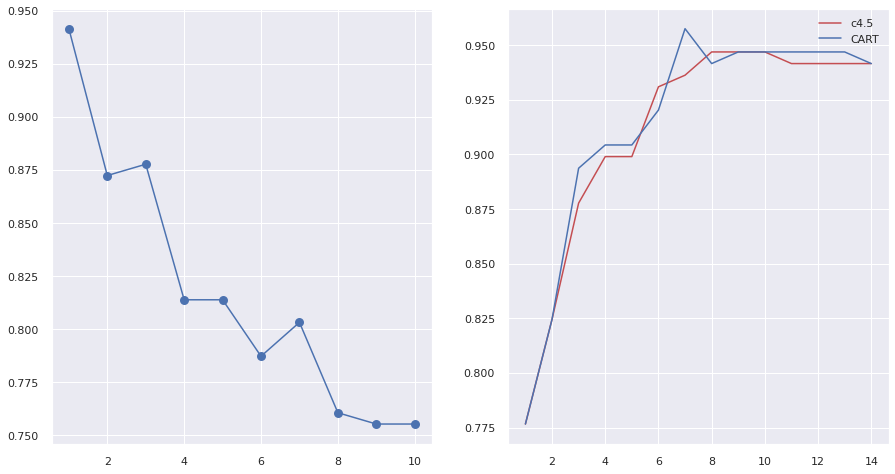

In [28]:
plt.subplots(ncols=2, nrows=1,figsize=(15,8),sharey=False,sharex=False)

#KNN
acc_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_12, y_train)
    pred=knn.predict(x_test_12)
    acc_rate.append(np.mean(pred==y_test))
    
# plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.grid(True)
plt.plot(range(1,11), acc_rate,marker='o', markersize=9)
# plt.show()

#C4.5 and CART
acc_rate_1=[]
acc_rate_2=[]

for i in range(1,15):
    c4_5 = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    cart = DecisionTreeClassifier(criterion="gini", max_depth = i)
    c4_5.fit(x_train_12, y_train)
    cart.fit(x_train_12, y_train)
    pred1=c4_5.predict(x_test_12)
    pred2=cart.predict(x_test_12)
    acc_rate_1.append(np.mean(pred1==y_test))
    acc_rate_2.append(np.mean(pred2==y_test))
    
# plt.figure(figsize=(5,5))
plt.subplot(1,2,2)
plt.grid(True)
plt.plot(range(1,15), acc_rate_1,'r')
plt.plot(range(1,15), acc_rate_2,'b')
plt.legend(['c4.5','CART'])
plt.show()

In [29]:
#SVM
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x_train_12, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [30]:
#GradientBoosting
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_train_12, y_train)
grid_search_gbc.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [31]:
model_name = ['C4.5','CART','RandomForest','Gaussian NaiveBayes','SVM','KNN','LogisticRegression','AdaBoost','GradientBoosting','xgb']

scaler = StandardScaler()
x_train_12 = scaler.fit_transform(x_train_12)
x_test_12 = scaler.transform(x_test_12)

model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
model2 = DecisionTreeClassifier(criterion="gini", max_depth = 14)
model3 = RandomForestClassifier(n_estimators=60, random_state=0)
model4 = GaussianNB()
model5 = SVC(C = 10, gamma = 0.1)
model6 = KNeighborsClassifier(n_neighbors = 5)
model7 = LogisticRegression()
model8 = AdaBoostClassifier()
model9 = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 200)
model10 = xgb.XGBClassifier(random_state=0,booster="gbtree")

models = [model1,model2,model3,model4,model5,model6,model7,model8,model9,model10]

In [32]:
for i in range(10):
    classification_model_report(models[i],model_name[i],0)

[18:32:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


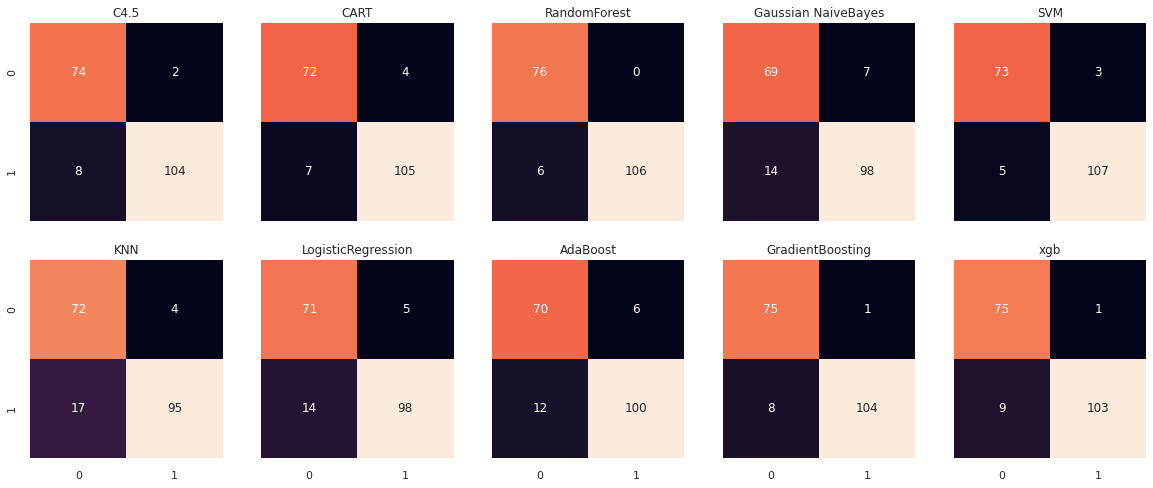

In [33]:
plt.subplots(ncols=5, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(1,11):
    plt.subplot(2,5,i)
    sns.heatmap(confusion_matrixs[i-1],annot=True,fmt="d",cbar=False)
    plt.title(model_name[i-1])

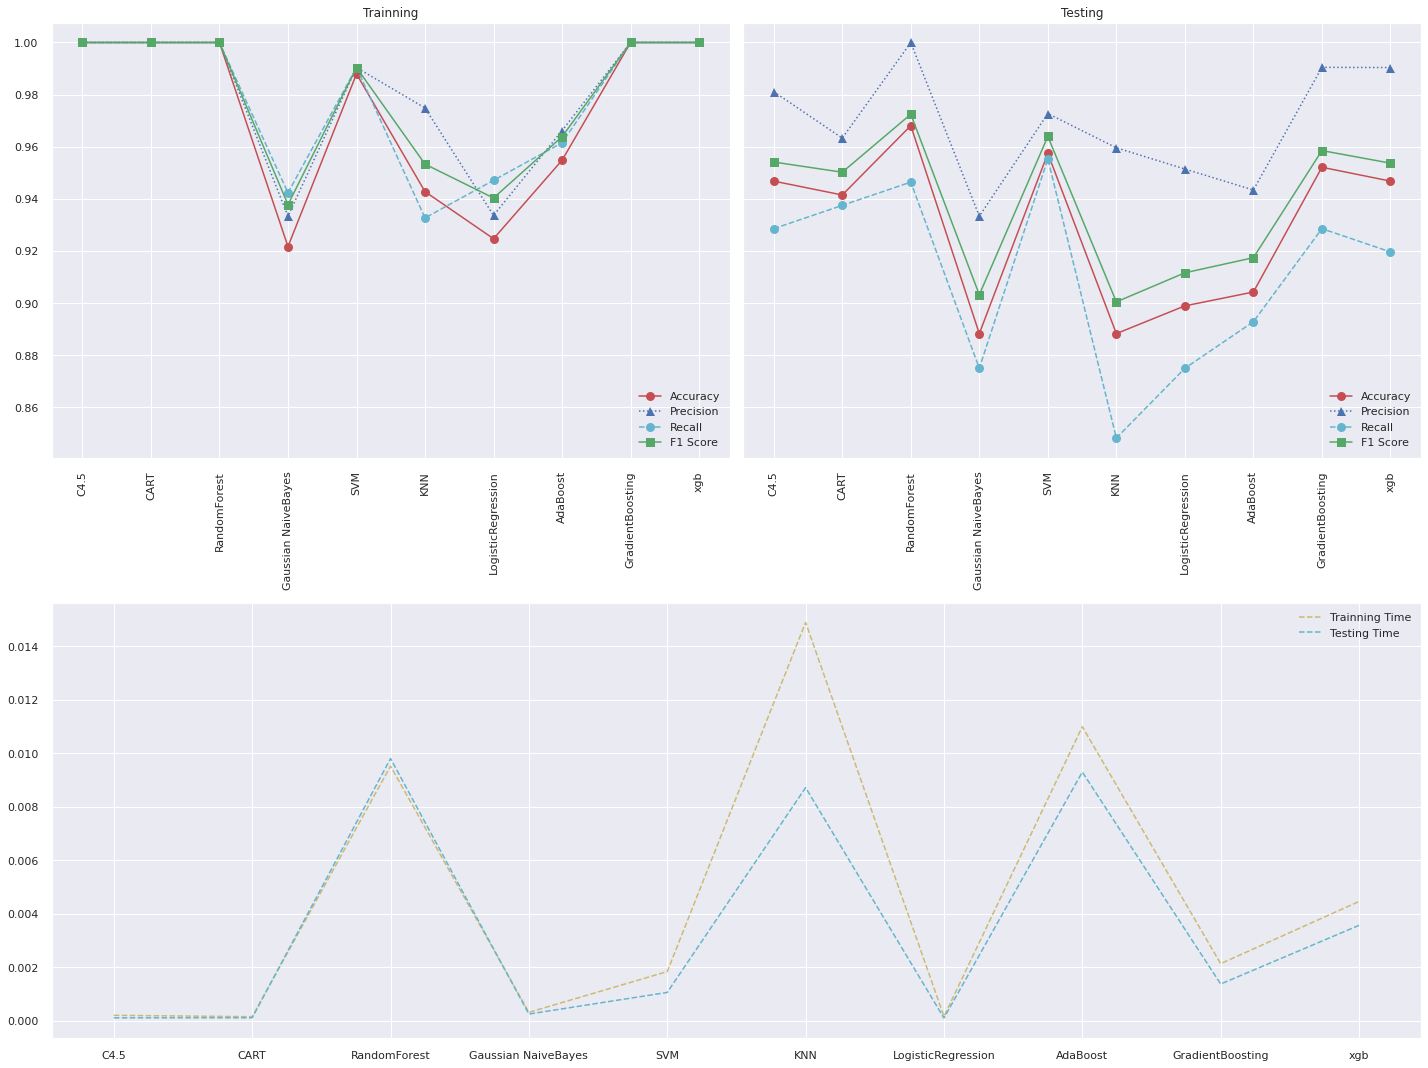

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(model_name,acc_train,'r',marker='o', markersize=9)
plt.plot(model_name,pres_train,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_train,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(model_name,acc_test,'r',marker='o', markersize=9)
plt.plot(model_name,pres_test,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_test,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(model_name,train_time,'y--')
plt.plot(model_name,test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
for i in range(len(model_name)):
    print(model_name[i]+" : "+str(acc_test[i]*100))

C4.5 : 94.68085106382979
CART : 94.14893617021278
RandomForest : 96.80851063829788
Gaussian NaiveBayes : 88.82978723404256
SVM : 95.74468085106383
KNN : 88.82978723404256
LogisticRegression : 89.8936170212766
AdaBoost : 90.42553191489363
GradientBoosting : 95.2127659574468
xgb : 94.68085106382979


In [36]:
selected_names = []
selected_models = []
selected_acc = []
for i in range(len(model_name)):
    if acc_test[i]>0.94:
        selected_names.append(model_name[i])
        selected_models.append(models[i])
        selected_acc.append(acc_test[i])
for i in range(len(selected_models)):
    print(selected_names[i]+" : "+str(selected_acc[i]*100))

C4.5 : 94.68085106382979
CART : 94.14893617021278
RandomForest : 96.80851063829788
SVM : 95.74468085106383
GradientBoosting : 95.2127659574468
xgb : 94.68085106382979


In [37]:
def estimate_creator(l):
    estm = []
    for i in l:
        estm.append((selected_names[i],selected_models[i]))
    return estm

In [38]:
from sklearn.ensemble import StackingClassifier

l = [[0,1,2,3,4],[3,1,5,2],[0,3,2,4],[0,1,3,2],[2,3,4,5],[3,1,2,4],[3,2,1,5],[3,2,1],[2,3,4]]

estimator_list = []
for i in range(len(l)):
    estimator_list.append(estimate_creator(l[i]))

# Build stack model
stack_model_list = []
for i in range(len(l)):
    stack_model_list.append(StackingClassifier(estimators=estimator_list[i], final_estimator=LogisticRegression()))

stack_model_name = []
for i in range(len(l)):
    stack_model_name.append(str("Meta Model "+str(i+1)))

In [39]:
stack_acc_train = []
stack_acc_test = []
stack_pres_train = []
stack_pres_test = []
stack_rec_train = []
stack_rec_test = []
stack_f1_train = []
stack_f1_test = []
stack_train_time = []
stack_test_time = []
stack_confusion_matrixs = []
test_prediction = []
train_prediction = []

In [40]:
def stack_classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(x_train_12,y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(x_train_12)
  end_time = time.time()
  train_time_model = end_time-start_time
  stack_train_time.append(train_time_model)
  train_prediction.append(pred_train)

  start_time = time.time()
  pred_test = model.predict(x_test_12)
  end_time = time.time()
  test_time_model = end_time-start_time
  stack_test_time.append(test_time_model)
  test_prediction.append(pred_test)
  
  #Print accuracy
  ac_train = accuracy_score(y_train,pred_train)
  ac_test = accuracy_score(y_test,pred_test)
  stack_acc_train.append(ac_train)
  stack_acc_test.append(ac_test)
  
  #Print precision
  pr_train = precision_score(y_train, pred_train)
  pr_test = precision_score(y_test, pred_test)
  stack_pres_train.append(pr_train)
  stack_pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(y_train, pred_train)
  re_test = recall_score(y_test, pred_test)
  stack_rec_train.append(re_train)
  stack_rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(y_train, pred_train)
  f_test = f1_score(y_test, pred_test)
  stack_f1_train.append(f_train)
  stack_f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(y_test,pred_test) 
  stack_confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [41]:
for i in range(len(l)):
    stack_classification_model_report(stack_model_list[i],stack_model_name[i],0)

[18:32:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

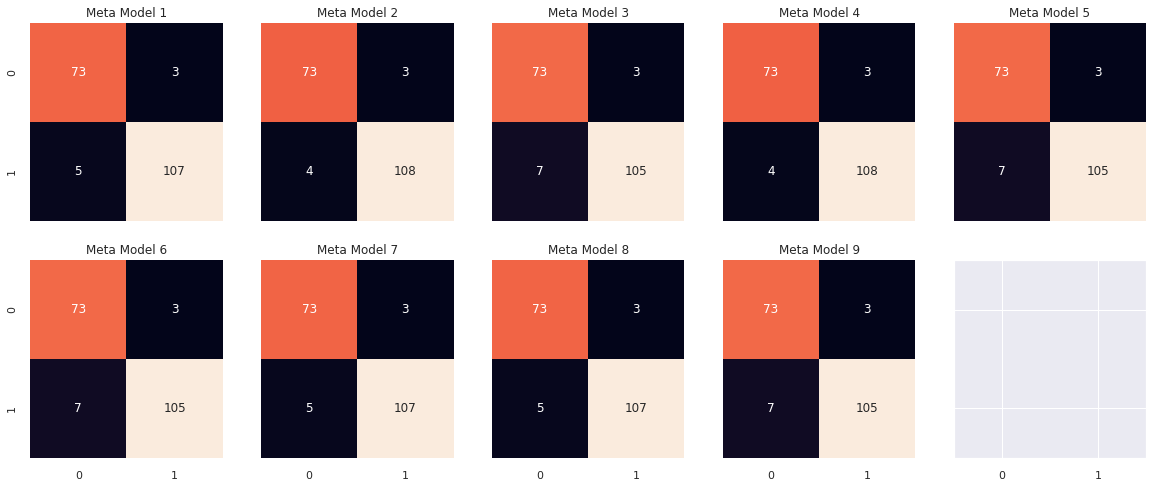

In [42]:
plt.subplots(ncols=5, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(len(l)):
    plt.subplot(2,5,i+1)
    sns.heatmap(stack_confusion_matrixs[i],annot=True,fmt="d",cbar=False)
    plt.title(stack_model_name[i])

In [43]:
for i in range(len(stack_model_name)):
    print(stack_model_name[i]+" : "+str(stack_acc_test[i]*100))

Meta Model 1 : 95.74468085106383
Meta Model 2 : 96.27659574468085
Meta Model 3 : 94.68085106382979
Meta Model 4 : 96.27659574468085
Meta Model 5 : 94.68085106382979
Meta Model 6 : 94.68085106382979
Meta Model 7 : 95.74468085106383
Meta Model 8 : 95.74468085106383
Meta Model 9 : 94.68085106382979


In [44]:
creator_test = {}
creator_test['Model'] = model_name
creator_test['Accuracy'] = acc_test
creator_test['Precision'] = pres_test
creator_test['Recall'] = rec_test
creator_test['F1 Score'] = f1_test
testing_ML_models = pd.DataFrame(creator_test)
testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,C4.5,0.946809,0.981132,0.928571,0.954128
1,CART,0.941489,0.963303,0.937500,0.950226
2,RandomForest,0.968085,1.000000,0.946429,0.972477
3,Gaussian NaiveBayes,0.888298,0.933333,0.875000,0.903226
4,SVM,0.957447,0.972727,0.955357,0.963964
5,KNN,0.888298,0.959596,0.848214,0.900474
6,LogisticRegression,0.898936,0.951456,0.875000,0.911628
7,AdaBoost,0.904255,0.943396,0.892857,0.917431
8,GradientBoosting,0.952128,0.990476,0.928571,0.958525
9,xgb,0.946809,0.990385,0.919643,0.953704


In [45]:
stack_creator_test = {}
stack_creator_test['Model'] = stack_model_name
stack_creator_test['Accuracy'] = stack_acc_test
stack_creator_test['Precision'] = stack_pres_test
stack_creator_test['Recall'] = stack_rec_test
stack_creator_test['F1 Score'] = stack_f1_test
stack_testing_ML_models = pd.DataFrame(stack_creator_test)
stack_testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.957447,0.972727,0.955357,0.963964
1,Meta Model 2,0.962766,0.972973,0.964286,0.968610
2,Meta Model 3,0.946809,0.972222,0.937500,0.954545
3,Meta Model 4,0.962766,0.972973,0.964286,0.968610
4,Meta Model 5,0.946809,0.972222,0.937500,0.954545
5,Meta Model 6,0.946809,0.972222,0.937500,0.954545
6,Meta Model 7,0.957447,0.972727,0.955357,0.963964
7,Meta Model 8,0.957447,0.972727,0.955357,0.963964
8,Meta Model 9,0.946809,0.972222,0.937500,0.954545
